# State transitions
▶ **Complex Systems Modeling of Human-Environment Interactions**<br>>> Open the latest version on the [*web*](https://wbarfuss.github.io/csm-of-hei/02.04-StateTransitions.html), [*Github*](https://github.com/wbarfuss/csm-of-hei/blob/main/02.04-StateTransitions.ipynb) or in [*GoogleColab*](https://colab.research.google.com/github/wbarfuss/csm-of-hei/blob/main/02.04-StateTransitions.ipynb) <<<br>
[Wolfram Barfuss](https://wbarfuss.github.io) | [University of Bonn](https://www.uni-bonn.de) | 2025/2026 

## Motivation | State-transitions models

**State-and-transition models** are useful tools to explain the causes and consequences of ecosystem change.

@fig-state-transition-model-in-mongolia shows a state-transition model of sandy-loamy alluvails soils in the dry steppe of eastern central Mongolia. 

![State transitions in the dry steppe of Mongolia](images/02.04-MongoliaStateTransitionModel.dio.png){#fig-state-transition-model-in-mongolia}

The model describes the dynamics of the vegetation in the region. The vegetation can be in one of four states: a *reference state*, *Forb decreased state*,  *Stipa grandis decreased state*, or *Degraded state*. The arrows indicate the possible transitions between the states [@BiggsEtAl2021]. 

@fig-land-cover-transitions-in-brazil shows possible state transitions between states of different land cover types in the Brazilian Amazon.

![Land-cover transitions in Brazilian Amazon](images/02.04-BrazilStateTransitionModel.dio.png){#fig-land-cover-transitions-in-brazil}

The thickness of the arrows indicates the probability of the transition. The land cover can be in one of five states: *Annual crops*, *Forest*, *Dirty Pasture*, *Clean Pasture*, *Secondary Vegetation*, plus an *Other* state representing all other possible land cover types [@Muller-HansenEtAl2017a]. 

State-and-transition models are **often co-developed with stakeholders** and are used as **heuristic tools** to understand the dynamics of ecosystems. They are also used in **scenario development** to explore possible futures. 


Note, that terms such as *state-and-transition model* and *transition model* have been widely used in the literature without a clear, formal definition [@DanielEtAl2016].


There are **various computational variants** of state-and-transition models. The simplest and most basic model is the one of a **Markov Chain**. 


### Learning goals

After this lecture, students will be able to:

- **Name** and **explain** the *components of a Markov chain model* and how the model relates to gernal dynamic system models to embed this model in the context of integrated nature-society models.
- **Simulate** and **visualize** *Markov chain models* stochastically, with ensembles, and via its state distribution
- **Compute** the *stationary distribution* of a Markov chain model numerically, analytically and explain the conditions for its existence to understand the long-term behavior of the model.
- **Investigate** the *transient behavior* of a Markov chain model to understand the short-term behavior of the model.
- **Compute** the *typical timesacle* of a Marko chain transition to relate the model to real-world systems.

## Markov chains

Markov chains model systems that transition probabilistically between a finite set of states.

In fact, Markov chains are **a very general model** that can be applied to a wide range of transitions. **For example**, a **political system** might transition between democratic and dictatorial, a **market** between volatile and stable regimes, or a **person** between happy, contemplative, anxious, and sad [@Page2018, Chapter 17].

The movements between states occur according to fixed probabilities. The probability that a country transitions from authoritarian to democratic in a given year might be 5%; the likelihood that a person transitions from anxious to tired within an hour may be 20%. 

Named after Russian mathematician Andrey Markov, the essential element of the model is the **Markov property**. This property states that the probability of transitioning to any particular state **depends solely on the current state** and not on the history of states that preceded it.

More formally, we define a Markov chain by the following elements:

* A discrete set of states $\mathcal S = \{S_1, S_2, \ldots, S_Z\}$.
* A transition matrix $\mathbf T$ with transition probabilities $T(i,j)$, for $1 < i,j < Z$, where $T(i,j)$ is the probability of transitioning from state $S_i$ to state $S_j$.
* A disscrete-time index $t=0,1,2,\dots$.
* An initial state distribution $\mathbf p_0 = \big(p_0(S_1), p_0(S_2), \dots, p_0(S_Z) \big)$, with $p_t(s)$ denoting the probability or fraction of state $s \in \mathcal S$ at time $t$.


Thus, the transition matrix $\mathbf T$ is a square matrix of size $Z \times Z$ with $\sum_{s'} T(s, s') = 1$, where $s$ denotes the current, and $s'$ the next state. Transition probabilities have to sum up to 1. We must go somewhere.

### A simple example

Let us consider a simple example of a Markov chain with two states modeling a prosperous and a degraded state of Nature.

![A simple Markov chain](images/02.04-SimpleExample.dio.png){#fig-simple-markov-chain}

### Computational model


Let us convert the mathematical into computationa model in Python.
We start by importing the necessary libraries and setting up the plotting environment.

In [ ]:
import numpy as np  
import sympy as sp
import matplotlib.pyplot as plt

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5); plt.rcParams['figure.dpi'] = 300
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # get the first color of the default color cycle
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; plt.rcParams['grid.linewidth'] = 0.25; 

But how to model the transition?

**Transition matrix**. We know that a the rows of our transition matrix have to sum up to one, $\sum_{s'} T(s, s') = 1$. Thus, we can simplify the transition matrix by only giving a collpase probability $p_c$ and a recovery probability $p_r$,

$$
\left(\begin{array}{cc}
    T(\mathsf{p,p}) & T(\mathsf{p,d}) \\
    T(\mathsf{d,p}) & T(\mathsf{d,d}) \\
\end{array}\right)
=
\left(\begin{array}{cc}
    1-p_c & p_c \\
    p_r & 1-p_r \\
\end{array}\right).
$$

Lets fix the values for the transition probabilities $p_c$ and $p_r$, for now,

In [ ]:
pc = 0.05
pr = 0.01

Then we can implement the transition matrix as a two-dimensional numpy array,

In [ ]:
T = np.array([[1-pc, pc],
              [pr, 1-pr]])
T

array([[0.95, 0.05],
       [0.01, 0.99]])

## Simulations

### A single simulation run

Considering the system to be in exaclty one of its states at each time step, we can **simulate** the Markov chain **stochastically** by choosing the next state (using `numpy.random.choice`) according to the transition probabilites as given in the transition matrix (by specifing the probabilities as `p=TransitionMatrix[current_state]`).

In [ ]:
def simulate_markov_chain(TransitionMatrix, InitialState, NrTimeSteps):
    trajetory = -1*np.ones(NrTimeSteps, dtype=int)    
    trajetory[0] = InitialState
    for t in range(1, NrTimeSteps):
        trajetory[t] = np.random.choice([0, 1], # sample next state 
                                        p=TransitionMatrix[trajetory[t-1]])
    return trajetory

Visualizing the results, we can see how the system evolves over time.

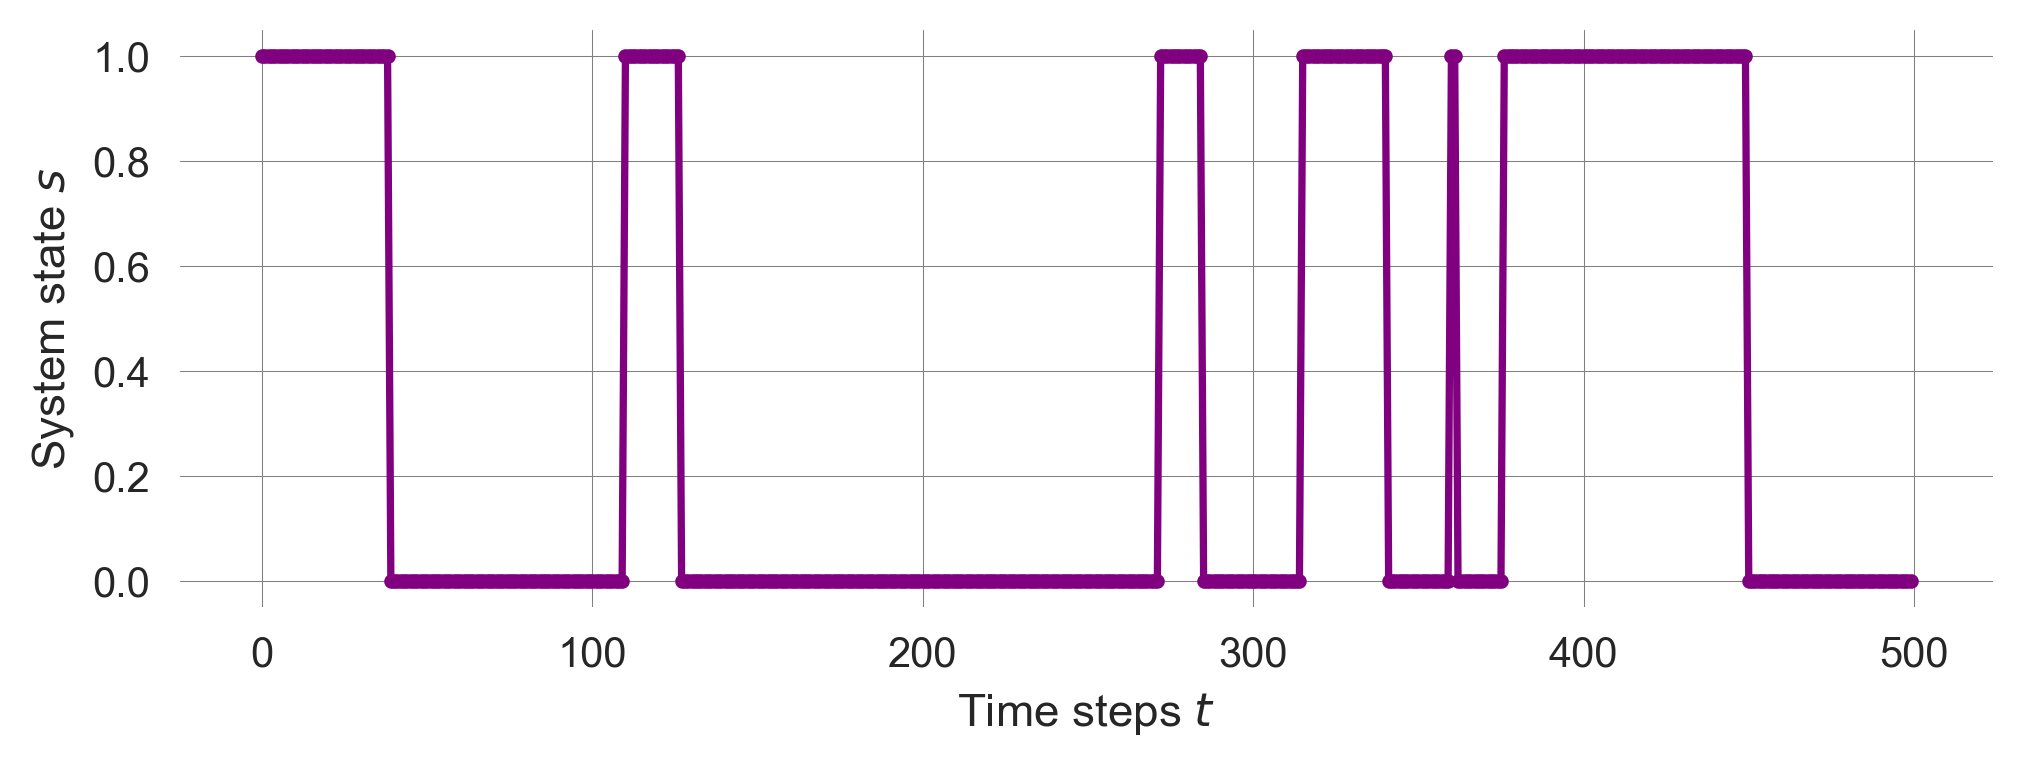

In [ ]:
np.random.seed(1818)
trajectory = simulate_markov_chain(T, 0, 500)
plt.plot(1-np.array(trajectory), ls='-', marker='.', color='purple');
plt.xlabel('Time steps $t$'); plt.ylabel('System state $s$');

This stochastic simulation of a **single run** has a strong **resemblance** to the previous dynamic system models we introduced. We can interpret the Markovian states as the stable equilibirum points of dynamic system with nonlinear changes and noise (see @fig-noise-induced-transitions from [02.03-Resilience](02.03-Resilience.ipynb)).

![Noise induced transitions](images/02.04-NoiseInducedTransitions.dio.png){#fig-noise-induced-transitions}

However, due to the stochastic nature of the Markov chain, it is hard to judge the system's behavior from a single run. We need to **average over many runs** to get a clearer picture of the system's behavior.

### Ensemble simulation

Let's repeat the previous simulation to create an **ensemble of stochastic simulation runs**. Let's assume we want an ensemble of 100 runs.

In [ ]:
ensemble = []
for _ in range(100):
    state = 0
    trajectory = simulate_markov_chain(T, state, 500)
    ensemble.append(trajectory)
ensemble = np.array(ensemble)

It is always a good idea to investigate the object one has just created for consistency, for instance, checking the shape of the ensemble.

In [ ]:
ensemble.shape

(100, 500)

The first dimension of the ensemble is the number of runs, the second dimension is the number of time steps.

Visualizing the ensemble by takeing the mean over the first dimension (using `ensemble.mean(axis=0)`), 

In [ ]:
ensemble.mean(axis=0).shape

(500,)


we can see how the system evolves over time on average.

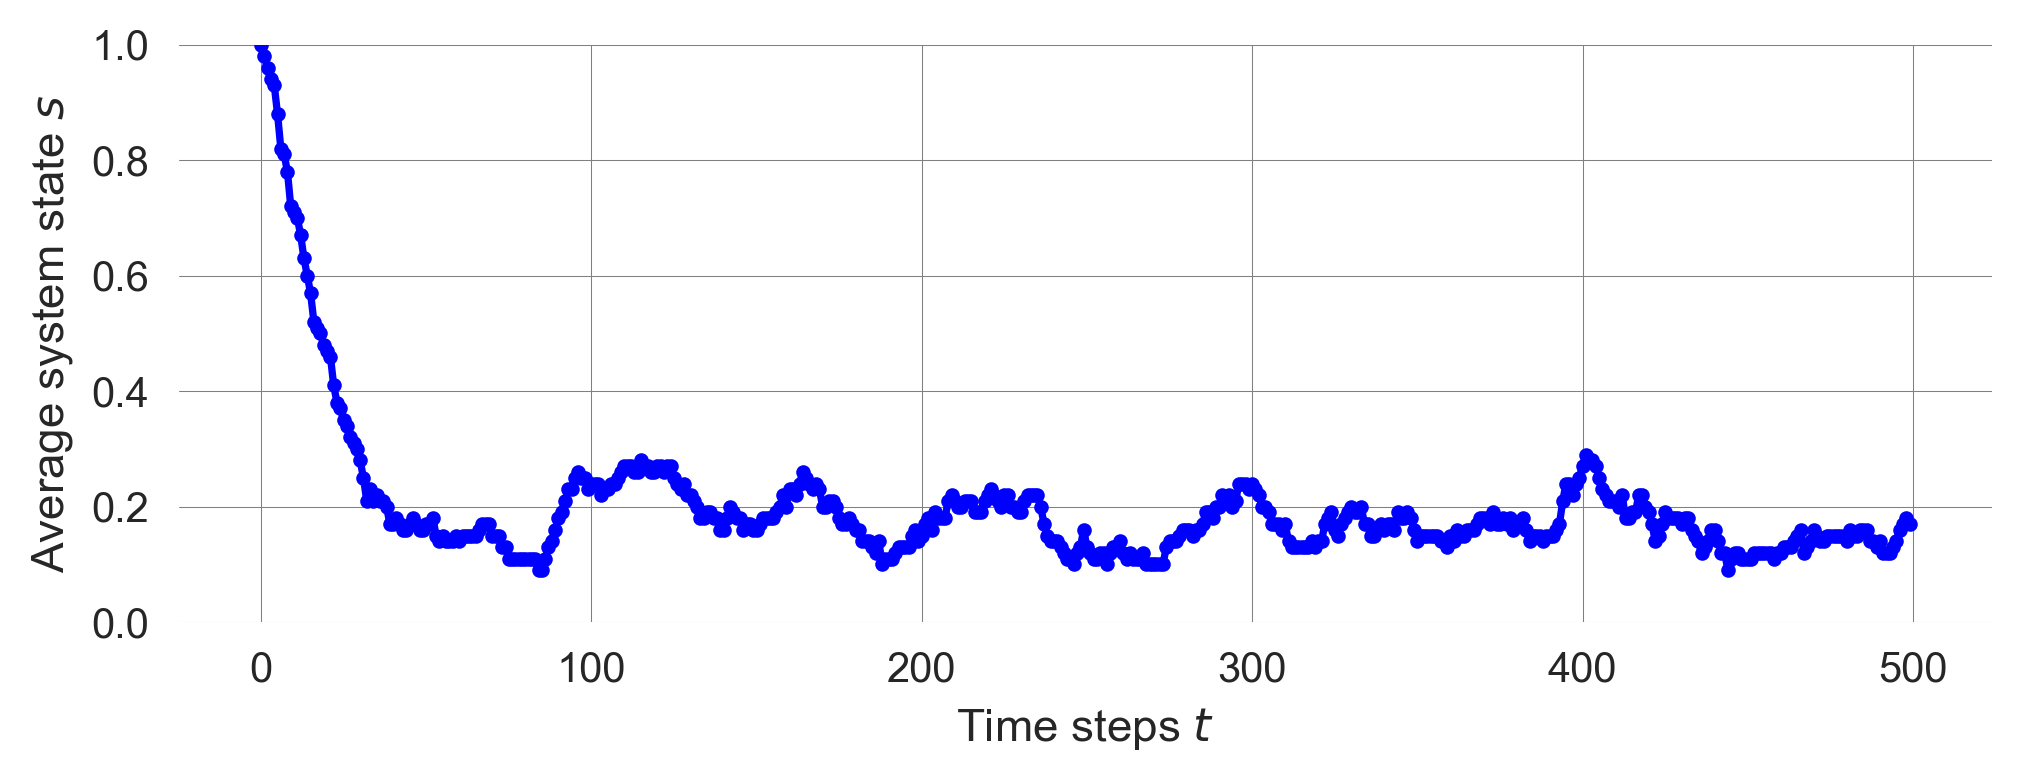

In [ ]:
plt.plot(1-ensemble.mean(0), ls='-', marker='.', color='blue')
plt.ylim(0, 1); plt.xlabel('Time steps $t$'); plt.ylabel('Average system state $s$');

We observe two phases. First a drop. Second, some fluctuations around approx. 0.2.

Thus, after around 50-100 iterations, the system is in approximatly 20 of 100 runs in the the prosperous state.

This is the **statistical equlibirum** or the **long-run stationary distribution** of the Markov chain.

Calculating ensembles is computationlly expensive. **Can we make the computation more efficient?** To do so, we investigate how to update the state distribution of the Markov chain at each time step.

### Markov chain update

A Markov chain **update** can be nicely **represented by a matrix operation**. The new state $\mathbf p_{t+1}$ equals the old state $\mathbf p_t$ applied to the transition matrix $\mathbf T$,

$$
\mathbf p_{t+1} = \mathbf p_t \mathbf T.
$$

We write the state distribution $\mathbf p_t$ before the transition matrix $\mathbf T$ on the right hand side to indicate the flow of information from left to right. We can also write this as follows,
$$
p_{t+1}({s'}) = \sum_s p_t(s) T(s, s'),
$$
where $s$ denotes the current, and $s'$ the next state. The next system state $s'$ depends on the current state $s$ and the transition from $s$ to $s'$ as given by the transition matrix $\mathbf T$.

Transposing the transition matrix, we can rewrite the Markov chain update as $p_{t+1}(s') = \sum_s T^\mathrm{T}(s',s) p_t(s)$ or 

$$
\mathbf p_{t+1} = \mathbf T^\mathrm{T} \mathbf p_t
$$ 

where $\mathbf T^\mathrm{T}$ is the transpose of the transition matrix. Rewriting this update as such highlights the fact that Markov chains can be intepreted as a **special kind of dynamic system** with linear changes (see [02.01-Nonlinearity](02.01-Nonlinearity.ipynb)) but with one additional property. The sum of all variables is always one. 



### State distribution evolution

We use the matrix update to simulate how the state distribution evolves.

In [ ]:
ps = [1, 0]  # initial state distribution
p_trajectory = [ps] # store the state distribution over time

for i in range(500): 
    ps = ps @ T  # matrix update for the state distribution
    p_trajectory.append(ps)
p_trajectory = np.array(p_trajectory)

The trajectory of the state distribution has the number of time steps as the first dimension and the number of states as the second dimension.

In [ ]:
p_trajectory.shape

(501, 2)

Since the state distribution is a probability distribution, the sum of all states at each time step should be one. We can check this by summing over the states at each time step.

In [ ]:
np.allclose(p_trajectory.sum(axis=-1), 1.0)

True

Visualizing the state distribution evolution together with the ensemble average reveals a close resembles between the two.

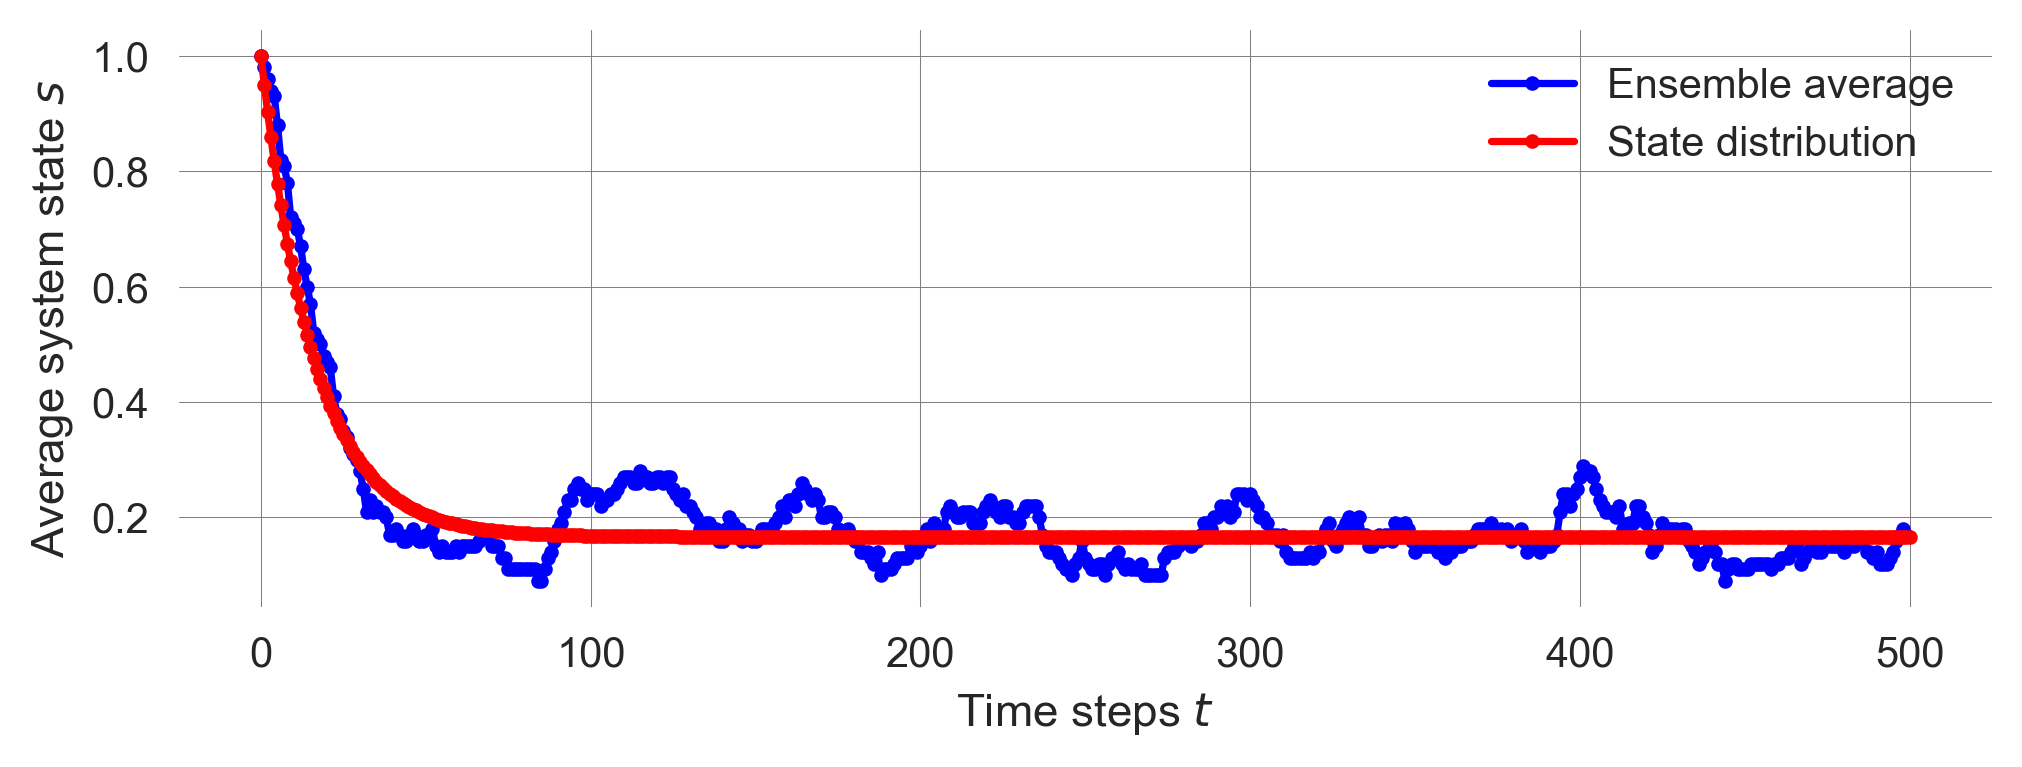

In [ ]:
plt.plot(1-ensemble.mean(0), ls='-', marker='.', color='blue', label='Ensemble average')
plt.plot(p_trajectory[:, 0], ls='-', marker='.', color='red', label='State distribution')
plt.xlabel('Time steps $t$'); plt.ylabel('Average system state $s$'); plt.legend();

The fluctuations of the ensemble average around the long-run stationary distribution are due to the finite number of runs in the ensemble. The more runs we have, the closer the ensemble average will be to the long-run stationary distribution. 

The flat line of the state distribution evolution indicates that the system has reached a **statistical equilibirum**.

**For example**, a statistical equilibrium in a Markov model of ideology would allow for people to transition between liberal, conservative, and independent, but the proportions of people of each ideology would remain unchanged. 

When applied to a single entity, a statistical equilibrium means that the long-run probability of the entity being in each state does not change. 

A person could be in a statistical equilibrium in which they are happy 60% of the time and sad 40% of the time. The person’s mental state could change from hour to hour, but his long-run distribution across those states does not [@Page2018].

However, can we **compute the stationary distribution somehow directly**?

## Stationary distribution

After showing how to compute the stationary distribution directly, we will first, compute it **numerically**, second, compute it **symbolically**, and last, we will discuss the conditions for its **existence**.

From the update equation,
$$
\mathbf p_{t+1} = \mathbf p_t \mathbf T.
$$
we know that the stationary distribution $\mathbf p^*$ must satisfy,
$$
\mathbf p^* = \mathbf p^* \mathbf T 
$$


This looks like the defining equation of a (left) **eigenvector** with the eigenvalue 1,
$$
1 \mathbf  p^* = \mathbf p^* \mathbf T 
$$

### Numerical stationary distribution

Fortunately, `numpy` has built-in routine to compute the eigenvectors of a matrix. Since the standard routine `np.linalg.eig` only computes the right eigenvectors, we need to apply the routine to the transposed matrix:



In [ ]:
eigvv = np.linalg.eig(T.T)
eigvv

EigResult(eigenvalues=array([0.94, 1.  ]), eigenvectors=array([[-0.70710678, -0.19611614],
       [ 0.70710678, -0.98058068]]))

In [ ]:
eigvv[1][:,1]

array([-0.19611614, -0.98058068])

Normalizing the eigenvector, such that it entries comprise a probability distribution, yields

In [ ]:
pstar = eigvv[1][:,1] / sum(eigvv[1][:,1])
pstar

array([0.16666667, 0.83333333])

Visualizing the stationary state distribution together with the state distribution evolution and the ensemble average reveals that the calculated stationary distribution fits perfectly to the distribution evolution in (statistical) equilibirum.

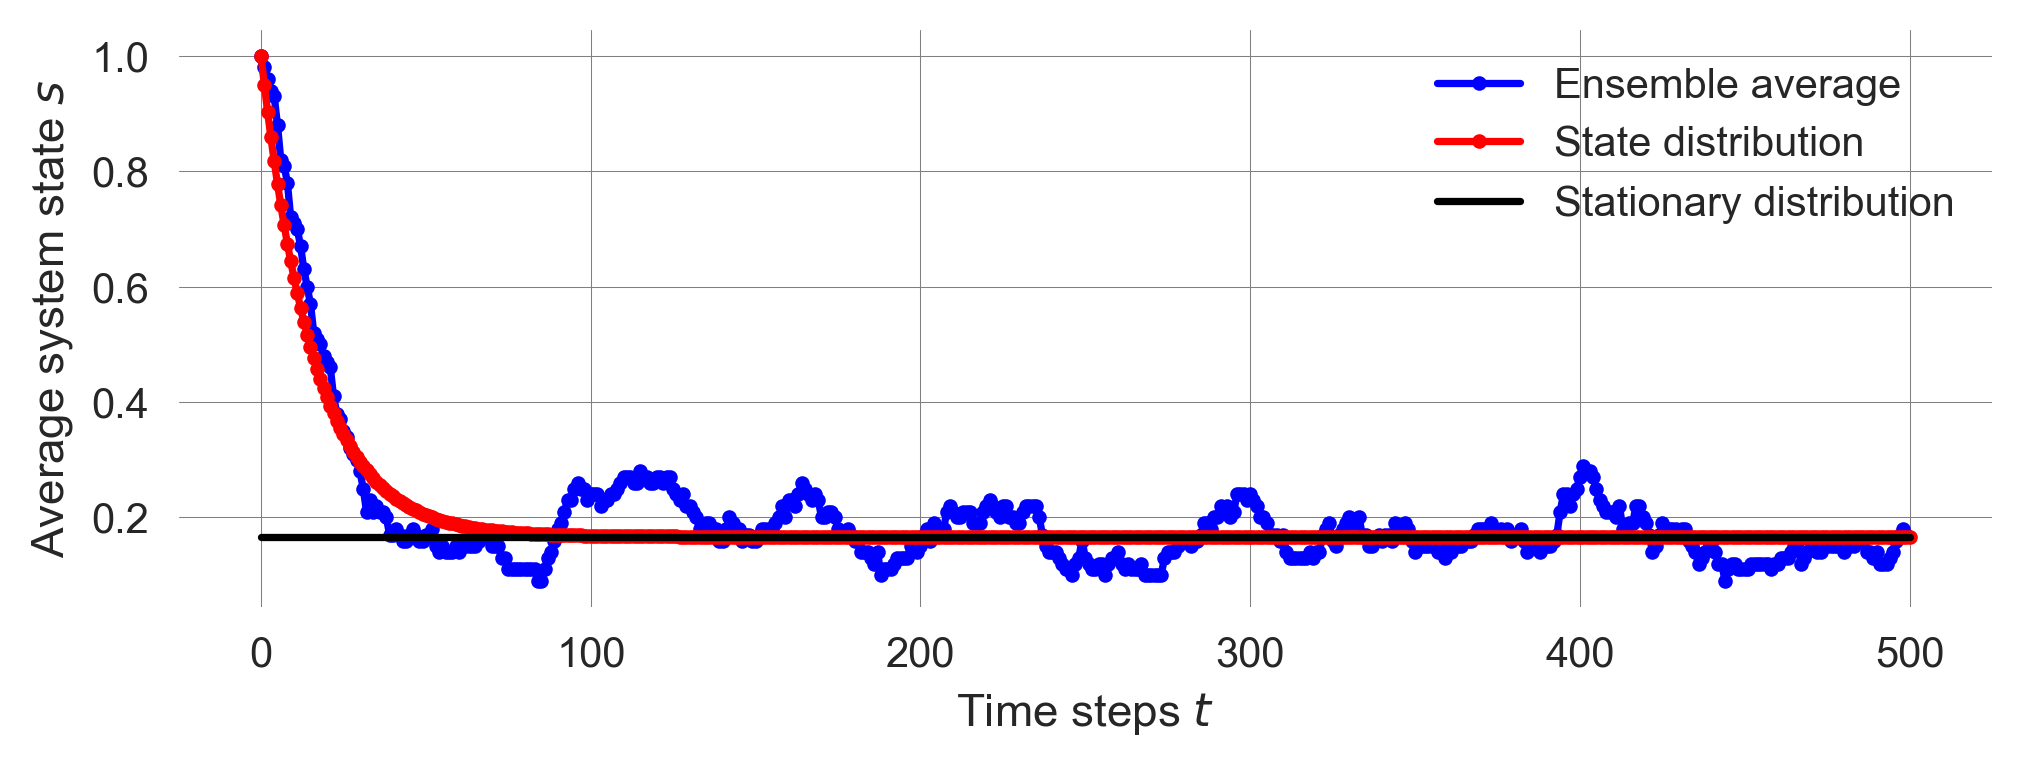

In [ ]:
plt.plot(1-ensemble.mean(0), ls='-', marker='.', color='blue', label='Ensemble average')
plt.plot(p_trajectory[:, 0], ls='-', marker='.', color='red', label='State distribution')
plt.plot([0,500], [pstar[0], pstar[0]], '-', color='k', label='Stationary distribution')
plt.xlabel('Time steps $t$'); plt.ylabel('Average system state $s$'); plt.legend();

How does this result depend on the model parameters, the collapse probability $p_c$ and the recovery probability $p_r$?

Can we **compute the stationary distribution analytically**, i.e., can we derive a mathematical equation which says how the stationary distribution depends on the collapse probability $p_c$ and the recovery probability $p_r$?

### Analytical stationary distribution

Fortunately, we can use Python's library for basic symbolic calculations `sympy`, to compute the eigenvectors of the transition matrix symbolically.

In [ ]:
p_c, p_r = sp.symbols("p_c, p_r")

In [ ]:
T_ = sp.Matrix([[1-p_c, p_c],
                [p_r, 1-p_r]])
T_

Matrix([
[1 - p_c,     p_c],
[    p_r, 1 - p_r]])

Applying the `.eigentvects()` method

In [ ]:
T_.T.eigenvects()

[(1,
  1,
  [Matrix([
   [p_r/p_c],
   [      1]])]),
 (-p_c - p_r + 1,
  1,
  [Matrix([
   [-1],
   [ 1]])])]

shows us which eigenvector corresponds to the eigenvalue 1: `T_.T.eigenvects()[0][2][0]`. The first element of each solution tuple is the eigenvalue.

Upon normalizing the eigenvector, we obtain the analytical stationary distribution,

In [ ]:
pstar_ = T_.T.eigenvects()[0][2][0] # selecting the eigenvector
pstar_ = pstar_ / (pstar_[0] + pstar_[1]) # normalizing the eigenvector
sp.simplify(pstar_)

Matrix([
[p_r/(p_c + p_r)],
[p_c/(p_c + p_r)]])

**Thus, only the fraction of $p_c$ and $p_r$ determines the stationary distribution.** The stationary distribution remains the same, if you multiply the collapse and recovery probabilities by the same factor. The fraction of the stationary distribution in the prosperous state is proportional to the recovery probability, $p_r$, i.e., the probability to enter the prosperous state from the degraed state. And vice versa, the fraction of the stationary distribution in the degraded state is proportional to the collapse probability, $p_c$, i.e., the probability to enter the degraded state from the prosperous state.

Last, to compare this analyitical solution with the numerical calculation we insert the values for $p_c$ and $p_r$ into the analytical solution.

In [ ]:
pstar_.subs(p_c, pc).subs(p_r, pr)

Matrix([
[0.166666666666667],
[0.833333333333333]])

In [ ]:
pstar

array([0.16666667, 0.83333333])

We observed the the **statistical equilibrium** in the Markov chain simulation and calculated the long-run stationary distribution both numerically and symbolically. But what are the **conditions that such a unique statistical equilibrium exists?**

### Stationary distribution | Existence

Any Markov model with a **finite set of states**, **fixed transition probabilities** between them, the **potential to move from any state to any other** in a series of transitions, and **no fixed cycles** between states converges to a unique equilibrium. These are the conditions of the Perron-Frobenius Theorem [@Page2018].

> #### Perron-Frobenius Theorem
> A Markov process converges to a unique statistical equilibrium provided it satisfies four conditions:
>
> * **Finite set of states**: $\mathcal S = {S_1, S_2, \dots, S_Z}$.
> * **Fixed transition rule**: The probabilities of moving between states are fixed, for example, the probability of transitioning from state $S_i$ to state $S_j$ equals $T(S_i, S_j)$ in every period.
> * **Ergodicity** (state accessibility): The system can get from any state to any other through a series of transitions.
> * **Noncyclic**: The system does not produce a deterministic cycle through a sequence of states.

The theorem implies that **if those four assumptions are satisfied**, the *initial state*, *history*, and *interventions that change the state* **cannot change the long-run equilibrium**.

The unique statistical equilibrium implies that long-run distributions of outcomes cannot depend on the initial state or on the path of events. In other words, initial conditions do not matter, and history does not matter in the long run. Nor can interventions that change the state matter. Any one-time change in the state of a system has at most a temporary effect.


For example, 

* if nations move between dictatorships and democracies according to fixed probabilities, then interventions that impose or encourage democracies in some countries have no long-term effects. 
* If fluctuations in dominant political ideologies satisfy the assumptions, then history cannot influence the long-run distribution over ideologies. 
* And if a person’s mental state can be represented as a Markov model, then words of encouragement or supportive gestures have no long-run impact.

The **takeaway** from the theorem should not be that history cannot matter but that **if history does matter, one of the model’s assumptions must be violated**.

Two assumptions—the finite number of states and no simple cycle—almost always hold. 

**Ergodicity** can be violated. However, in practice, it is often possible to ensure ergodicity by adding a tiny transition probability between states that are not directly connected. This tiny transition probability can justified by our lack of knowledge about the system.



Thus, the **assumption of fixed transition probabilities** between states is the least likely to be valid. When history is important, something must alter the transition probabilities. 

**For example**, take the issue of assisting families in **escaping poverty**. The forces that create social inequality have proven immune to policy interventions. In Markov models, interventions that change families’ **states**—such as special programs for underperforming students or a one-day food drive—can provide temporary boosts. They cannot change the long-run equilibrium. In contrast, interventions that provide resources and training to improve people’s ability to keep jobs, and therefore their **probability** of moving from employed to unemployed, could change long-run outcomes [@Page2018].

We investigated the long-run behavior of the Markov chain model. But **what about the short-term behavior**?

## Transient behavior

We found that our example system's statistical equilibirum, its stationary distribution, depends only on the fraction of the collapse and recovery probabilities, $p_c$ and $p_r$. 

To investigate the short-term behavior before the evolution of the state distribuion reaches its equlibirum, we create different pairs of collapse and recovery probabilities while keeping their fraction constant.

In [ ]:
prs = np.array([0.1, 0.03, 0.01, 0.003, 0.001])
pcs = 5 * prs
pcs

array([0.5  , 0.15 , 0.05 , 0.015, 0.005])

We can insert these in the `sympy` matrix as follows,

In [ ]:
np.array(T_.subs(p_c, pc).subs(p_r, pr), dtype=float)

array([[0.95, 0.05],
       [0.01, 0.99]])

### Simulating different transition probabilities
It is convenient to define a function to obtain the time evolution for the state distributions.

In [ ]:
def compute_distribution_trajectory(T):  # Transition matrix 
    ps = [1, 0]
    p_trajectory = []

    for i in range(500): 
        ps = ps @ T
        p_trajectory.append(ps)
    return np.array(p_trajectory)

With that function, we simply compute the time evolution of the state distribution for the different values of $p_r$ and $p_c$.

In [ ]:
trajs = []
for pr, pc in zip(prs, pcs):
    Tmat = np.array(T_.subs(p_c, pc).subs(p_r, pr), dtype=float)
    trajs.append(compute_distribution_trajectory(Tmat))
np.array(trajs).shape

(5, 500, 2)

### Visualizing distribution trajectories

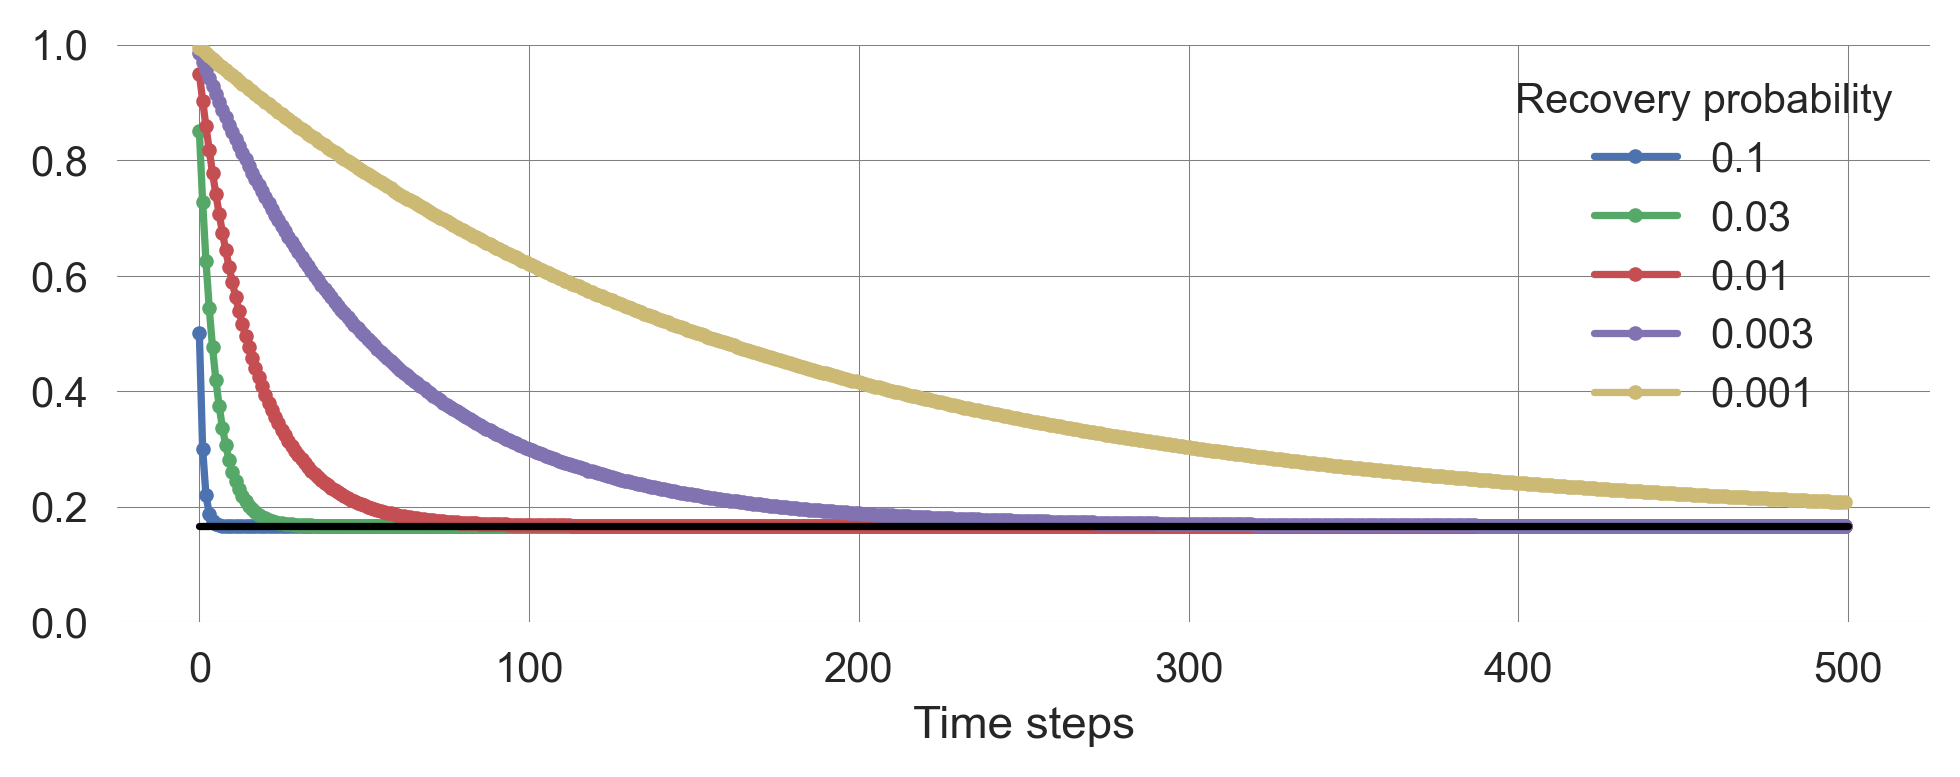

In [ ]:
for i, traj in enumerate(trajs):
    plt.plot(traj[:, 0], ls='-', marker='.', label=prs[i])
plt.plot([0,500], [pstar[0], pstar[0]], '-', color='black')
plt.ylim(0, 1); plt.xlabel('Time steps'); plt.legend(title='Recovery probability');

**The smaller the transition probabilities, the longer it takes to reach the stationary distribution.**

## Timescales 



Sometimes, it can be interesting or adquate to think about the typical **timescales** of a system. For example, consider the typical timescale it takes a system to tip into another state. **How can we identify the notion of timescale in a Markov chain?**

Let us identify a notion of timescale as the average **number of time steps** spend in a particular state before a transition occurs. How can we calculate it?

We will first compute these timescales numerically, showcasing somewhat more advanced maniumplation using Python. Then we turn to an analytical formula and compare the results.

### Numerical computation

To investigate this question nummerically, we re-create a (long) trajectory of states.

In [ ]:
np.random.seed(0)
state = 0
pc = 0.2
pr = 0.04
T = np.array(T_.subs(p_c, pc).subs(p_r, pr), dtype=float)
trajectory = []
for i in range(500000):
    state = np.random.choice([0,1], p=T[state])
    trajectory.append(state)
trajectory = np.array(trajectory)

Looking at the first 100 states

In [ ]:
shorttraj = trajectory[:99]
shorttraj

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

How do we obtain the lengths of the `0` and `1` sequences?

We can subtract the trajectory by itsel with an offset of one time step. For the first 100 time steps, this looks like

In [ ]:
shorttraj[0:-1] - shorttraj[1:]

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1])

With `np.nonzero` with obtain the 'cutpoints' where the states change,

In [ ]:
cutpoint = np.nonzero(trajectory[0:-1] - trajectory[1:])
cutpoint

(array([     6,     15,     16, ..., 499966, 499981, 499987],
       shape=(33131,)),)

With `np.diff`, we obtain the differences between the cutpoints. These are the lengths of the sequences.

In [ ]:
lengths = np.diff(cutpoint)
lengths 

array([[ 9,  1, 17, ...,  1, 15,  6]], shape=(1, 33130))

The lengths of the prosperous states are in the odd elements of the `lengths` iterable, since we started the simulation in the degraded state (`state=0`) and discarded the first occurrences in that state using `np.diff`.  
Taking the average yields

In [ ]:
length_prosperous = np.mean(lengths[0][1::2])
length_prosperous

np.float64(5.030485964382735)

The lengths of the degraded states are in the even elements of the `lengths` iterable.
Taking the average yields

In [ ]:
length_degraded = np.mean(lengths[0][0::2])
length_degraded

np.float64(25.152490190159977)

### Analytical computation

The average number of time steps $T$ it takes until a transition occurs, given a transition probability $p$, is
$$
T = \sum_{n=0}^\infty n (1-p)^{n-1} p = \frac{1}{p}.
$$

For a sequence of length $n$ it took $n-1$ time steps to remain in state $s$ before the transition. The probability of remaining in state $s$ for $n-1$ time steps is $(1-p)^{n-1}$. At the $n$'th time step, the transition occurs with probability $p$.

This is the expected value of a geometric random variable with parameter $p$. The number of steps $T$ spent in state $s$ before a transition occurs can be thought of as the number of trials until the first success in a sequence of Bernoulli trials, where each trial has a success probability of $p$ of transitioning out of $s$. In probability theory, the number of trials required to get the first success in such a situation is described by a geometric random variable. It expected value is $\mathbb{E}[T] = 1/p$.





For the prosperous state, we have

In [ ]:
1/pc

5.0

compared to our numerical estimate

In [ ]:
length_prosperous

np.float64(5.030485964382735)

For the degraded state, we have

In [ ]:
1/pr

25.0

compared to our numerical estimate

In [ ]:
length_degraded

np.float64(25.152490190159977)

Thus, the average number of time steps before a transition occurs equals the inverse transition probability $1/p$. This gives us an indication of the typical timescale of the system.

### Example | Regime shifts timescales

Typical collapse and recovery timescales of regime shifts from the [Regime Shifts Database](https://www.regimeshifts.org/) have been mapped to the transition probabilities of a Markov chain in this way [@BarfussEtAl2024] (@fig-Markov-timescales).

![Timescales](images/02.04-Timescales.dio.png){#fig-Markov-timescales}

## Learning goals revisited

- We introduced the *components of a Markov chain model* and covered how the model relates to gernal dynamic system models to place this model in the context of integrated nature-society models.
- We simulated and visualized *Markov chain models* in multiple ways: stochastically, with ensembles, and via its state distribution to understand how the model behaves.
- We computed the *stationary distribution* of a Markov chain model numerically, analytically and explain the conditions for its existence to understand the long-term behavior of the model.
- We investigated the *transient behavior* of a Markov chain model to understand the short-term behavior of the model.
- We computed the *typical timesacle* of a Marko chain transition to relate the model to real-world systems.










The [exercises for this lecture](https://wbarfuss.github.io/csm-of-hei/02.04ex-StateTransitions.html) will investigate a three-state Markov chain, exploring the transition between a risky, degraded and sustainable state.

::: {.content-hidden unless-profile="standalone"}

## References

:::

::: {.content-hidden unless-profile="housekeeping"}

## Housekeeping

With the following cells, we can convert this notebook into slides and a PDF handout. If you work with this notebook interactively, you can ignore them.

In [ ]:
!jupyter nbconvert 02.04-StateTransitions.ipynb --to slides --embed-images --TagRemovePreprocessor.enabled=True \
    --TagRemovePreprocessor.remove_cell_tags hide_cell \
    --TagRemovePreprocessor.remove_input_tags hide_input \
    --TagRemovePreprocessor.remove_all_outputs_tags hide_outputs \
    --output-dir "./__slides"

[NbConvertApp] Converting notebook 02.04-StateTransitions.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 18514814 bytes to __slides/02.04-StateTransitions.slides.html


---
metadata-files: [_standalone-quarto.yml]
---

#| output: false 
!cp 02.04-StateTransitions.ipynb 02.04-MarkovianTransitions_.ipynb
!quarto render 02.04-MarkovianTransitions_.ipynb --to pdf --profile standalone
!mv 02.04-MarkovianTransitions_.pdf __scripts/02.04-StateTransitions.pdf
!rm -r 02.04-MarkovianTransitions_*

:::